# Potential conflicts in transatlantic flights #

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap
import conflict
import analysis
import os
import networkx as nx
import tools
import matplotlib.backends.backend_pdf
import matplotlib.backends.backend_pgf
import seaborn

In [2]:
%matplotlib inline

In [3]:
delays = [6, 9, 12, 15, 18, 24, 36, 48, 60]
nc = []
ne = []
es = []

for d in delays:
    edges = pd.read_csv('../data/conflictGraphs/atm_conflict_graph_maxDepartDelayPrecalculation%03i.txt' % d, sep=' ', header=None).values
    g = nx.Graph()
    g.add_edges_from(edges)
    components = nx.connected_component_subgraphs(g)
    sortedComponents = sorted(list(components), key=lambda x: len(x.nodes()))
    #print  d, len(sortedComponents), "connected components"
    nc.append(len(sortedComponents))
    ne.append(len(edges))
    es.append(edges)


In [4]:
delays = [6, 9, 12, 15, 18, 24, 36, 48, 60]

npara = []
npoint = []
# read in all data
inputFile = '../data/TrajDataV2_20120729.txt'
trajectories = pd.read_csv('%s.csv' % inputFile, index_col='flightIndex')
for d in delays:


    mindistance = 30.0
    mintime = d + 3
    delayPerConflict = 0
    dthreshold = 3
    maxDepartDelay = d

    name = "mindist%05.1f_mintime%03i" % (mindistance, mintime)
    reducedPointConflictFile = "%s.%s.reducedPointConflicts_delay%03i_thres%03i_depart%03i.csv" % (inputFile, name, delayPerConflict, dthreshold, maxDepartDelay)
    reducedParallelConflictFile = "%s.%s.reducedParallelConflicts_delay%03i_thres%03i_depart%03i.csv" % (inputFile, name, delayPerConflict, dthreshold, maxDepartDelay)

    reducedPointConflicts = pd.read_csv(reducedPointConflictFile, index_col='conflictIndex')
    reducedParallelConflicts= pd.read_csv(reducedParallelConflictFile, index_col='parallelConflict')
    npoint.append(len(reducedPointConflicts))
    npara.append(len(reducedParallelConflicts.index.unique()))

In [5]:
Nf = len(trajectories.index.unique())
delays = [6, 9, 12, 15, 18, 24, 36, 48, 60]
nctrivial = []
for d in delays:
    edges = pd.read_csv('../data/conflictGraphs/atm_conflict_graph_maxDepartDelayPrecalculation%03i.txt' % d, sep=' ', header=None).values
    count = 0
    for i in range(Nf):
        if i not in edges:
            count = count + 1
    #print  d, len(sortedComponents), "connected components"
    nctrivial.append(count)

In [30]:
f = open('connected_components.npz', 'w')
np.savez(f, nc=nc, nctrivial=nctrivial)
f.close()

In [29]:
infile = open('connected_components.npz')
npzfile = np.load(infile)
nc = npzfile["nc"]
nc = npzfile["nctrivial"]
infile.close()

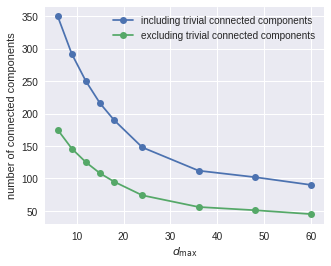

In [26]:
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)

ax.plot(delays, np.array(nc) + np.array(nctrivial), 'o-', label='including trivial connected components')
ax.plot(delays, nc, 'o-', label='excluding trivial connected components')

ax.set_ylabel('number of connected components')
ax.set_xlabel('$d_\mathrm{max}$')
ax.legend()

pdf = matplotlib.backends.backend_pdf.PdfPages('../../paper/pics/instances/num_cc.pdf');
pdf.savefig(figure=fig);
pdf.close();

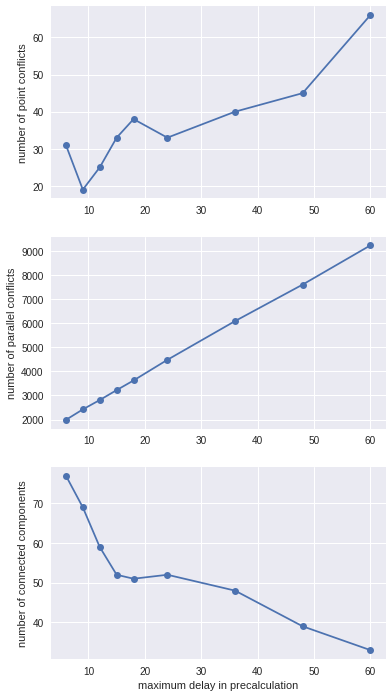

In [64]:
fig = plt.figure(figsize=(6, 12))
ax = fig.add_subplot(3, 1, 1)
ax.plot(delays, npoint, 'o-')
ax.set_ylabel('number of point conflicts')

ax = fig.add_subplot(3, 1, 2)
ax.plot(delays, npara, 'o-')
ax.set_ylabel('number of parallel conflicts')
ax = fig.add_subplot(3, 1, 3)
ax.plot(delays, nc, 'o-')
ax.set_ylabel('number of connected components')
ax.set_xlabel('maximum delay in precalculation')



In [65]:
color21 = ['k'] * len(es[5])
n = 0
for i, j in es[5]:
    if (i, j) not in es[4]:
        print i, j
        color21[n] = 'r'
    n = n + 1

33 102
99 212
106 189
125 979
125 975
437 466
750 945
805 856
895 922


In [66]:
color18 = ['k'] * len(es[4])
n = 0
for i, j in es[4]:
    if (i, j) not in es[3]:
        print i, j
        color18[n] = 'r'
    n = n + 1

40 47
265 266
267 273
275 287
383 420
477 494
619 637
955 959


In [67]:
for i, j in es[4]:
    if (i, j) not in es[5]:
        print i, j

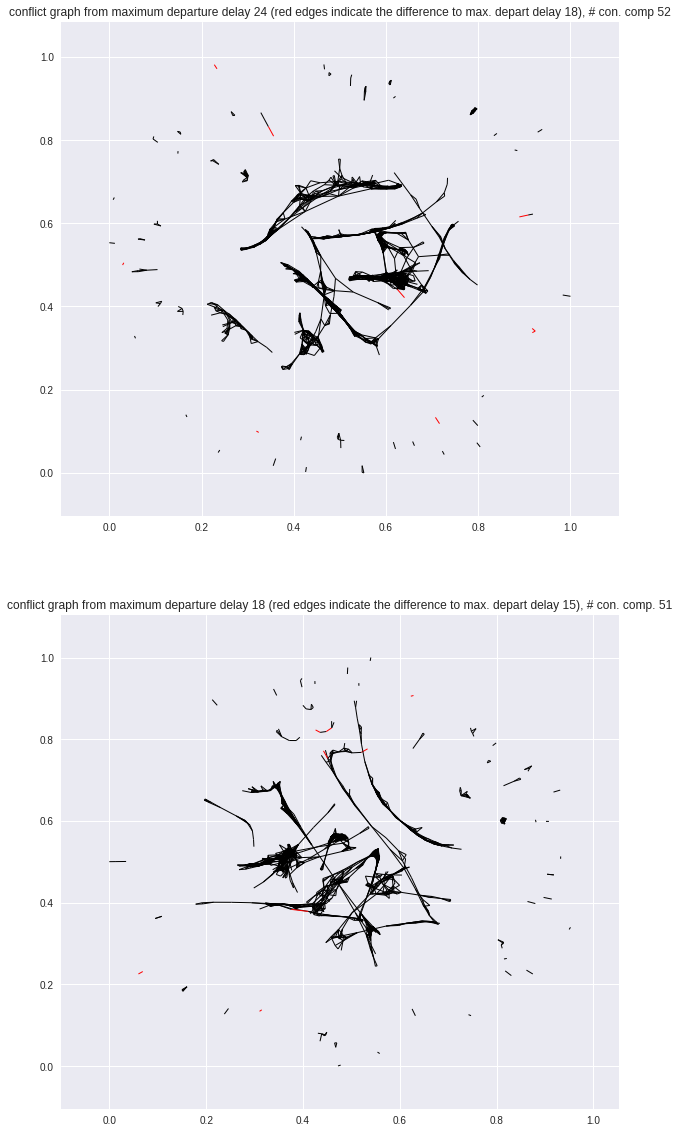

In [11]:
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(2, 1, 1)
g = nx.Graph()
g.add_edges_from(es[5])
nx.draw_networkx_edges(g, nx.layout.spring_layout(g), edge_color=color21, ax=ax)
ax.set_title('conflict graph from maximum departure delay 24 (red edges indicate the difference to max. depart delay 18), # con. comp 52')

ax = fig.add_subplot(2, 1, 2)
g = nx.Graph()
g.add_edges_from(es[4])
nx.draw_networkx_edges(g, nx.layout.spring_layout(g), edge_color=color18, ax=ax)
ax.set_title('conflict graph from maximum departure delay 18 (red edges indicate the difference to max. depart delay 15), # con. comp. 51')

pdf = matplotlib.backends.backend_pdf.PdfPages('number_of_connected_components_vs_max_delay.pdf');
pdf.savefig(figure=fig);
pdf.close();

In [68]:
delays = [6, 9, 12, 15, 18, 24, 36, 48, 60]
nc = []
ne = []
es = []
nf = {}
nc_dict = {}
for d in delays:
    edges = pd.read_csv('../data/conflictGraphs/atm_conflict_graph_maxDepartDelayPrecalculation%03i.txt' % d, sep=' ', header=None).values
    g = nx.Graph()
    g.add_edges_from(edges)
    components = nx.connected_component_subgraphs(g)
    sortedComponents = sorted(list(components), key=lambda x: len(x.nodes()))
    nf[d] = []
    for cc in sortedComponents:
        nf[d].append(cc.number_of_nodes())
    #print  d, len(sortedComponents), "connected components"
    nc.append(len(sortedComponents))
    nc_dict[d] = len(sortedComponents)
    ne.append(len(edges))
    es.append(edges)

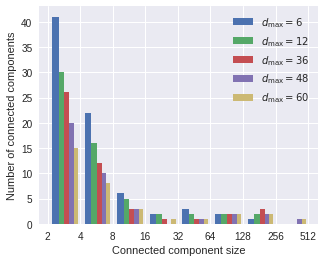

In [110]:
delays = [6, 12, 36, 48, 60]
nd = len(delays)
#fig = plt.figure(figsize=(5, 3 * nd))
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1, 1, 1)
seaborn.set_palette('deep', n_colors=nd)
dplot = []
for d in delays:
    dplot.append(list(nf[d]))
ls = np.logspace(1, 9, 9, base=2)
n, bins, patches = ax.hist(dplot, bins=ls, histtype='bar', label=["$d_\mathrm{max}=%i$" % d for d in delays] )
ax.set_xscale('log', basex=2)
ax.legend();
ax.set_ylabel('Number of connected components');
ax.set_xticks(ls)

ax.set_xticklabels(['%i' % i  for i in np.logspace(1, 9, 9, base=2)])

ax.set_xlabel('Connected component size');
pdf = matplotlib.backends.backend_pdf.PdfPages('paperpics/instances/analysis_cc.pdf');
pdf.savefig(figure=fig);
pdf.close();


In [98]:
np.logspace(1.5, 9.5, 9, base=2)


array([   2.82842712,    5.65685425,   11.3137085 ,   22.627417  ,
         45.254834  ,   90.50966799,  181.01933598,  362.03867197,
        724.07734394])

In [105]:
bins

array([    2.,     4.,     8.,    16.,    32.,    64.,   128.,   256.,
         512.,  1024.])

In [71]:
ranges = zip(ls[:-1], ls[1:] )

In [74]:
plt.hist?

In [5]:
edges = pd.read_csv('../data/conflictGraphs/atm_conflict_graph_maxDepartDelayPrecalculation%03i.txt' % 60, sep=' ', header=None).values
g = nx.Graph()
g.add_edges_from(edges)
components = nx.connected_component_subgraphs(g)
sortedComponents = sorted(list(components), key=lambda x: len(x.nodes()))